# Zero Noise Extrapolation for photonic quantum circuits

Results from the Quantum Open Source Foundation (QOSF) 2023 Cohort 7

**Ramachandran SS and Victor Onofre**

In this notebook, we explore a naive noise model for the beam splitters in the Rx and Ry convention and compare results with the perfect simulations. Also, a simple version of Zero Noise Extrapolation (ZNE) is implemented with the noise model and real QPU.

1. [Beam Splitters as rotations](#BS_rotations)
    1. [Rotations to compute the identity operator](#rotation_identity)
2. [Simulations](#simulations)
    1. [Noiseless simulation](#perfect_simulation)
    2. [Noisy simulation](#noisy_simulation)
3. [Zero Noise Extrapolation (ZNE)](#ZNE) 
    1. [ZNE with 2 Rx](#ZNE_2_rx) 
    2. [ZNE with 2 Rx and 2 Ry](#ZNE_2_rx_ry) 
4. [QPU Results](#QPU) 
5. [Conclusions and future work](#conclusions) 

In [31]:
import perceval as pcvl
import sympy as sp
import numpy as np
from perceval.components import BS, PS
import random
import matplotlib.pyplot as plt
from perceval.algorithm import Sampler

# 1. Beam Splitters as rotations <a name="BS_rotations"></a>

Beam splitters are optical devices that couple two spatial modes together, acting on |0,1> and |1,0> . Three specialized conventions are defined (Rx, Ry and H) [1], with a single parameter ($\theta = \pi/2$), as follows:

In [2]:
bs_rx = BS.Rx()
bs_ry = BS.Ry()
bs_h = BS.H()

A Beam-Splitter in Rx convention for theta pi/2:


Visual representation of the same Beam-Splitter:


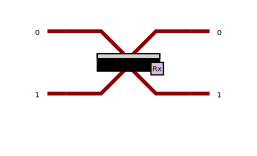

In [3]:
print("A Beam-Splitter in Rx convention for theta pi/2:")
pcvl.pdisplay(bs_rx.compute_unitary())# Matrix representation of the beam splitter with the rotation x (Rx) convention 
print("Visual representation of the same Beam-Splitter:")
pcvl.pdisplay(bs_rx) # Visual representation in circuit of Rx  

If we change the angle to $\theta = \pi$, we have an X operator with a global phase $i$.

In [4]:
bs_rx_2 = BS.Rx(theta=np.pi)
print("A Beam-Splitter in Rx convention for theta pi:")
pcvl.pdisplay(bs_rx_2.compute_unitary())

A Beam-Splitter in Rx convention for theta pi:


A Beam-Splitter in Ry convention for theta pi/2:


Visual representation of the same Beam-Splitter:


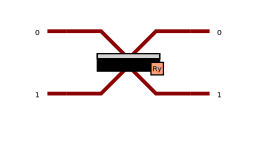

In [5]:
print("A Beam-Splitter in Ry convention for theta pi/2:")
pcvl.pdisplay(bs_ry.compute_unitary())# Matrix representation of the beam splitter with the rotation y (Ry) convention 
print("Visual representation of the same Beam-Splitter:")
pcvl.pdisplay(bs_ry) # Visual representation in circuit of Ry  

In [6]:
bs_ry_2 = BS.Ry(theta=np.pi)
print("A Beam-Splitter in Ry convention for theta pi:")
pcvl.pdisplay(bs_ry_2.compute_unitary())

A Beam-Splitter in Ry convention for theta pi:


## 1.1 Rotations to compute the identity operator <a name="rotation_identity"></a>

Using the Beam-Splitter we can compute the identiy operator. If we use two BS in Rx convention each with $\theta = \pi$, we obtain the identity operator with a global phase $-1$

Two Beam-Splitter in the Rx convention with theta pi gives an identiy operator with a global phase:


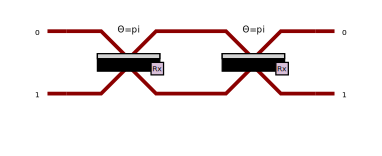

In [7]:
identity_with_phase = (pcvl.Circuit(2, name="identity")
           .add(0, bs_rx_2)
           .add(0, bs_rx_2))

print("Two Beam-Splitter in the Rx convention with theta pi gives an identiy operator with a global phase:")
pcvl.pdisplay(identity_with_phase.compute_unitary())
pcvl.pdisplay(identity_with_phase)

If we repeat Rx with $\theta = \pi$ four times, we obtain the identity operator without the globla phase

Four Beam-Splitter in the Rx convention with theta pi gives an identiy operator:


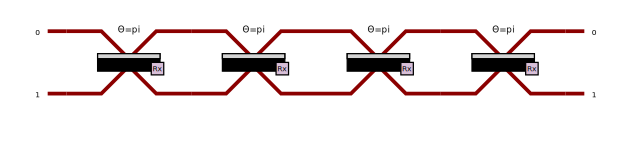

In [8]:
identity = (pcvl.Circuit(2, name="identity")
           .add(0, bs_rx_2)
           .add(0, bs_rx_2)
           .add(0, bs_rx_2)
           .add(0, bs_rx_2))

print("Four Beam-Splitter in the Rx convention with theta pi gives an identiy operator:")
pcvl.pdisplay(identity.compute_unitary())
pcvl.pdisplay(identity)

# 2. Simulations <a id="simulations"></a>

## 2.1 Noiseless simulation <a id="perfect_simulation"></a>

In [9]:
source = pcvl.Source()

In [10]:
p = pcvl.Processor("SLOS", identity_with_phase , source)

In [11]:
p.with_input(pcvl.BasicState([1, 0]))

In the simulation we obtain the same state as the initial input given that the circuit representes the indentity operator

In [12]:
output_distribution = p.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|1,0>",1


## 2.2 Noisy simulation <a name="noisy_simulation"></a>

We can add a random noise in the form of an error in the angle of the BS: 
    $$ \theta_{noisy} = \theta - X $$
    

where $X \sim \mathcal{U}(a, b)$ in the range $0.001 \leq   X \leq \pi/20 $ and $\theta = \pi$
 


In [13]:
noise_angle_x = random.uniform(0.001, np.pi/20)
bs_noisy_rx = BS.Rx(theta= np.pi - noise_angle_x)

Effects of the noise in the Beam-Splitter in the Rx convention:


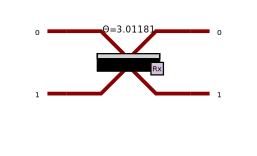

In [14]:
print("Effects of the noise in the Beam-Splitter in the Rx convention:")
pcvl.pdisplay(bs_noisy_rx.compute_unitary())
pcvl.pdisplay(bs_noisy_rx)

In [15]:
p = pcvl.Processor("SLOS", bs_noisy_rx, source)

In the simulation we obtain the same state as the initial input and the flip state with low proability given the noise in the circuit

In [16]:
p.with_input(pcvl.BasicState([1, 0]))
output_distribution = p.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|0,1>",0.995795
"|1,0>",0.004205


Effects of the noise in the Identity operator using two Beam-Splitter in the Rx convention:


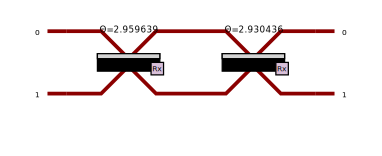

In [17]:
noise_angle_x_1 = random.uniform(0.01, np.pi/10)
noise_angle_x_2 = random.uniform(0.01, np.pi/10)

identity_nosiy_2 = (pcvl.Circuit(2, name="identity")
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_1))
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_2)))

print("Effects of the noise in the Identity operator using two Beam-Splitter in the Rx convention:")
pcvl.pdisplay(identity_nosiy_2 .compute_unitary())
pcvl.pdisplay(identity_nosiy_2)

Effects of the noise in the Identity operator using four Beam-Splitter in the Rx convention:


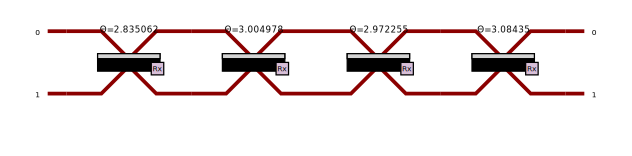

In [18]:
noise_angle_x_1 = random.uniform(0.01, np.pi/10)
noise_angle_x_2 = random.uniform(0.01, np.pi/10)
noise_angle_x_3 = random.uniform(0.01, np.pi/10)
noise_angle_x_4 = random.uniform(0.01, np.pi/10)

identity_nosiy_4 = (pcvl.Circuit(2, name="identity")
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_1))
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_2))
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_3))
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_4)))

print("Effects of the noise in the Identity operator using four Beam-Splitter in the Rx convention:")
pcvl.pdisplay(identity_nosiy_4.compute_unitary())
pcvl.pdisplay(identity_nosiy_4)

In [19]:
p = pcvl.Processor("SLOS",identity_nosiy_4 , source)
p.with_input(pcvl.BasicState([1, 0]))

Increasing the number of BS will increase the noise, increasing the probability of obtaining the wrong state

In [20]:
output_distribution = p.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|1,0>",0.891996
"|0,1>",0.108004


# 3. Zero Noise Extrapolation <a name="ZNE"></a>

In the Zero-noise extrapolation (ZNE) technique a quantum circuit is modified to run at different noise scales [2]. The result is extrapolated to an estimated value at noiseless level. There are multiple ways of scaling the noise in this work we use unitary folding, replacing a unitary circuit $U$ by:

$$ U \rightarrow U(U^\dagger U )^n $$



The first circuit we are going to use is the following:

## 3.1 ZNE with 2 Rx <a name="ZNE_2_rx"></a>

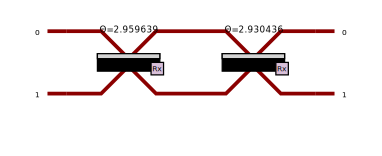

In [21]:
pcvl.pdisplay(identity_nosiy_2)

In [22]:
results = []
noise_scaling = []

source = pcvl.Source(emission_probability=0.70, multiphoton_component=0.04, losses=0.3)

source = pcvl.Source()

scaling = 0


for x in range(1, 9, 2):
    scaling+=1
    noise_scaling.append(scaling)
    print("Noise Scaling:", scaling)

    circuit_id_noise = pcvl.Circuit(2)

    for i in range(x):
        noise_angle_x_1 = random.uniform(0.001, np.pi/20)
        noise_angle_x_2 = random.uniform(0.001, np.pi/20)

        circuit_id_noise.add((0, 1), BS.Rx(theta= np.pi - noise_angle_x_1 ))
        circuit_id_noise.add((0, 1), BS.Rx(theta= np.pi - noise_angle_x_2 ))

         
    p = pcvl.Processor("SLOS", circuit_id_noise, source)

    p.with_input(pcvl.BasicState([1, 0]))

    output_distribution = p.probs()["results"]
    pcvl.pdisplay(output_distribution, max_v=10)

    for output_bs, prob in output_distribution.items():
        output_state = output_bs
        if (output_state[0] == 1 and output_state[1] == 0):
            results.append(prob)

Noise Scaling: 1


state,probability
"|1,0>",0.995079
"|0,1>",0.004921


Noise Scaling: 2


state,probability
"|1,0>",0.991588
"|0,1>",0.008412


Noise Scaling: 3


state,probability
"|1,0>",0.909332
"|0,1>",0.090668


Noise Scaling: 4


state,probability
"|1,0>",0.754507
"|0,1>",0.245493


In [23]:
polynomial_1 = np.polyfit(noise_scaling,results,deg=1)
polynomial_2 = np.polyfit(noise_scaling,results,deg=2)
polynomial_3 = np.polyfit(noise_scaling,results,deg=3)

x_new = np.array([0])
y_1 = np.polyval(polynomial_1,x_new)
y_2 = np.polyval(polynomial_2,x_new)
y_3 = np.polyval(polynomial_3,x_new)

print("Result without ZNE:",results[0])
print("Correct result:", 1)
print("----------------------------------")
print("Results of the extrapolations")
print("Linear extrapolation:", y_1 )
print("Polinomial extrapolation order: 2 ", y_2 )
print("Polinomial extrapolation order 3:", y_3)


Result without ZNE: 0.9950787551280919
Correct result: 1
----------------------------------
Results of the extrapolations
Linear extrapolation: [1.11361921]
Polinomial extrapolation order: 2  [0.92445125]
Polinomial extrapolation order 3: [0.91361044]


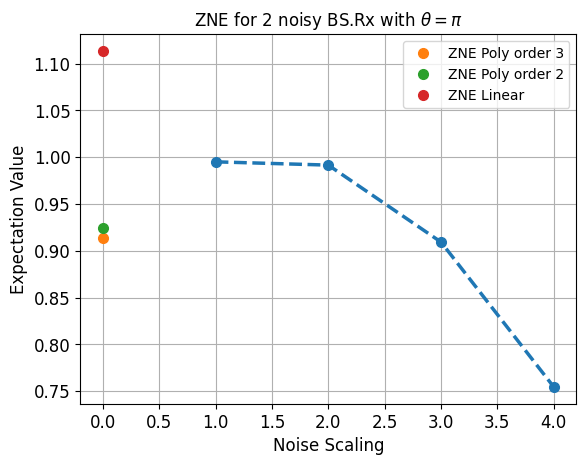

In [24]:
plt.plot(noise_scaling,results, "o--", linewidth=2.5, markersize=7)
plt.plot(0,y_3, "o", markersize=7, label = "ZNE Poly order 3")
plt.plot(0,y_2, "o", markersize=7, label = "ZNE Poly order 2")
plt.plot(0,y_1, "o", markersize=7, label = "ZNE Linear")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(r"ZNE for 2 noisy BS.Rx with $ \theta = \pi$")
plt.xlabel('Noise Scaling', size= 12)
plt.ylabel('Expectation Value', size=12)
plt.legend()
plt.grid()
plt.show()

## 3.1 ZNE with 2 Rx and 2 Ry <a name="ZNE_2_rx_ry"></a>

The second circuit we are going to use is the following:

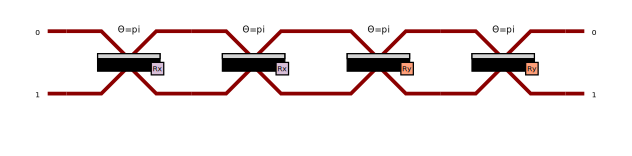

In [87]:
rx_ry = (pcvl.Circuit(2)
           .add(0, BS.Rx(theta= np.pi ))
           .add(0, BS.Rx(theta= np.pi ))
           .add(0, BS.Ry(theta= np.pi ))
           .add(0, BS.Ry(theta= np.pi )))

pcvl.pdisplay(rx_ry.compute_unitary())
pcvl.pdisplay(rx_ry)

Result without ZNE: 0.9738084906184881
Correct result: 1
----------------------------------
Results of the extrapolations
Linear extrapolation: [1.16739182]
Polinomial extrapolation order: 2  [0.96937626]
Polinomial extrapolation order 3: [1.19503213]


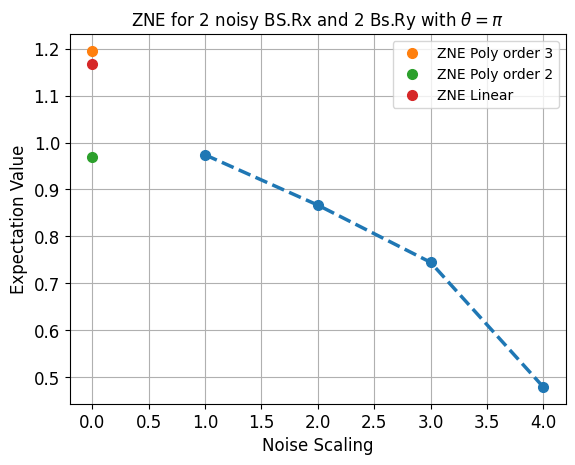

In [26]:
results = []
noise_scaling = []

source = pcvl.Source(emission_probability=0.70, multiphoton_component=0.04, losses=0.3)

source = pcvl.Source()

scaling = 0


for x in range(1, 9, 2):
    scaling+=1
    noise_scaling.append(scaling)
    #print("Noise Scaling:", scaling)

    circuit_id_noise = pcvl.Circuit(2)

    for i in range(x):
        noise_angle_x_1 = random.uniform(0.001, np.pi/20)
        noise_angle_x_2 = random.uniform(0.001, np.pi/20)
        noise_angle_x_3 = random.uniform(0.001, np.pi/20)
        noise_angle_x_4 = random.uniform(0.001, np.pi/20)

        circuit_id_noise.add((0, 1), BS.Rx(theta= np.pi - noise_angle_x_1 ))
        circuit_id_noise.add((0, 1), BS.Rx(theta= np.pi - noise_angle_x_2 ))
        circuit_id_noise.add((0, 1), BS.Ry(theta= np.pi - noise_angle_x_3 ))
        circuit_id_noise.add((0, 1), BS.Ry(theta= np.pi - noise_angle_x_4 ))
         
    p = pcvl.Processor("SLOS", circuit_id_noise, source)

    p.with_input(pcvl.BasicState([1, 0]))

    output_distribution = p.probs()["results"]
    #pcvl.pdisplay(output_distribution, max_v=10)

    for output_bs, prob in output_distribution.items():
        output_state = output_bs
        if (output_state[0] == 1 and output_state[1] == 0):
            results.append(prob)
            
polynomial_1 = np.polyfit(noise_scaling,results,deg=1)
polynomial_2 = np.polyfit(noise_scaling,results,deg=2)
polynomial_3 = np.polyfit(noise_scaling,results,deg=3)

x_new = np.array([0])
y_1 = np.polyval(polynomial_1,x_new)
y_2 = np.polyval(polynomial_2,x_new)
y_3 = np.polyval(polynomial_3,x_new)

print("Result without ZNE:",results[0])
print("Correct result:", 1)
print("----------------------------------")
print("Results of the extrapolations")
print("Linear extrapolation:", y_1 )
print("Polinomial extrapolation order: 2 ", y_2 )
print("Polinomial extrapolation order 3:", y_3)

plt.plot(noise_scaling,results, "o--", linewidth=2.5, markersize=7)
plt.plot(0,y_3, "o", markersize=7, label = "ZNE Poly order 3")
plt.plot(0,y_2, "o", markersize=7, label = "ZNE Poly order 2")
plt.plot(0,y_1, "o", markersize=7, label = "ZNE Linear")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(r"ZNE for 2 noisy BS.Rx and 2 Bs.Ry with $ \theta = \pi$")
plt.xlabel('Noise Scaling', size= 12)
plt.ylabel('Expectation Value', size=12)
plt.legend()
plt.grid()
plt.show()


# 4. QPU results <a name="QPU"></a>

At the moment of using `Sampler` an error occurs where the number of counts is bigger than the input samples.  

In [ ]:
token_qcloud = ''
remote_simulator = pcvl.RemoteProcessor("sim:ascella", token_qcloud)
print(remote_simulator.available_commands)

Noise Scaling: 1
{
  |1,0>: 116826
  |0,1>: 718
}
Noise Scaling: 2
{
  |1,0>: 117127
  |0,1>: 202
}
Noise Scaling: 3
{
  |1,0>: 119414
  |0,1>: 276
}
Noise Scaling: 4
{
  |1,0>: 117208
  |0,1>: 420
}
QPU Result without ZNE: 0.9938916490845981
Correct result: 1
----------------------------------
Results of the extrapolations
Linear extrapolation: [0.99481611]
Polinomial extrapolation order: 2  [0.98775196]
Polinomial extrapolation order 3: [0.98024327]


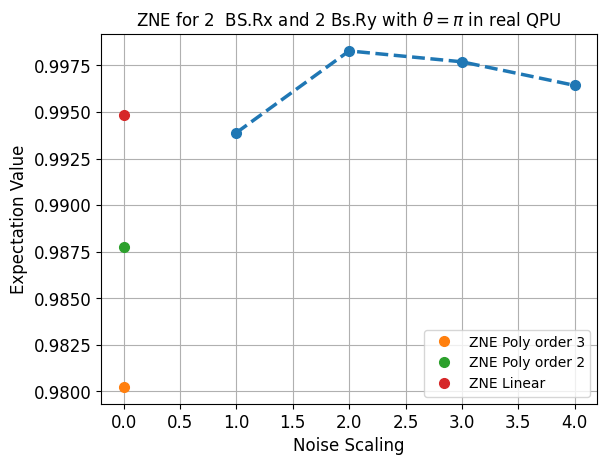

In [103]:
results_qpu = []
noise_scaling_qpu = []

source = pcvl.Source(emission_probability=0.70, multiphoton_component=0.04, losses=0.3)

source = pcvl.Source()

scaling = 0


for x in range(1, 9, 2):
    scaling+=1
    noise_scaling_qpu.append(scaling)
    print("Noise Scaling:", scaling)

    circuit_id_noise = pcvl.Circuit(2)

    for i in range(x):
        circuit_id_noise.add((0, 1), BS.Rx(theta= np.pi))
        circuit_id_noise.add((0, 1), BS.Rx(theta= np.pi))
        circuit_id_noise.add((0, 1), BS.Ry(theta= np.pi))
        circuit_id_noise.add((0, 1), BS.Ry(theta= np.pi))
         
    #p = pcvl.Processor("SLOS", circuit_id_noise, source)
    remote_qpu = pcvl.RemoteProcessor("qpu:ascella", token_qcloud) 

    remote_qpu.with_input(pcvl.BasicState([1, 0]))
    
    nsample = 10000
    remote_job = sampler.sample_count(nsample)
    print(remote_job['results'])

    #output_distribution = p.probs()["results"]
    #pcvl.pdisplay(output_distribution, max_v=10)

    for output_state, count in remote_job['results'].items():
        if (output_state[0] == 1 and output_state[1] == 0):
            results_qpu.append(count/remote_job['results'].total())
            
polynomial_1 = np.polyfit(noise_scaling,results_qpu,deg=1)
polynomial_2 = np.polyfit(noise_scaling,results_qpu,deg=2)
polynomial_3 = np.polyfit(noise_scaling,results_qpu,deg=3)

x_new = np.array([0])
y_1 = np.polyval(polynomial_1,x_new)
y_2 = np.polyval(polynomial_2,x_new)
y_3 = np.polyval(polynomial_3,x_new)

print("QPU Result without ZNE:",results_qpu[0])
print("Correct result:", 1)
print("----------------------------------")
print("Results of the extrapolations")
print("Linear extrapolation:", y_1 )
print("Polinomial extrapolation order: 2 ", y_2 )
print("Polinomial extrapolation order 3:", y_3)

plt.plot(noise_scaling,results_qpu, "o--", linewidth=2.5, markersize=7)
plt.plot(0,y_3, "o", markersize=7, label = "ZNE Poly order 3")
plt.plot(0,y_2, "o", markersize=7, label = "ZNE Poly order 2")
plt.plot(0,y_1, "o", markersize=7, label = "ZNE Linear")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(r"ZNE for 2  BS.Rx and 2 Bs.Ry with $ \theta = \pi$ in real QPU")
plt.xlabel('Noise Scaling', size= 12)
plt.ylabel('Expectation Value', size=12)
plt.legend()
plt.grid()
plt.show()

# 5. Conclusions and future work

The naive noise model with random noise in the angle of the beam splitter shows similar results as with the real QPU noisy system. Further improvement to the model is necessary for a better generalization. The results of the simple ZNE implementation demonstrate a margin of improvement compared with the unmitigated results, even though the way noise in linear optical components scales is different from the usual way of applying ZNE. A more thorough study of how to apply ZNE to quantum photonics is necessary.     

## References

[1] https://perceval.quandela.net/docs/index.html 

[2] https://arxiv.org/abs/2005.10921 
